# Module 1. Samples

## Getting Started with Jupyter Notebooks

Jupyter Notebooks (or iPython Notebooks) are files with a mixture of Markdown and Python code. It's a very convenient format so we'll be using this quite a lot during this course!

### Google Colab

To get started, it is not necessary to install software on your laptop. [Google Colab](https://colab.research.google.com/) is a free online iPython development environment, but it does require a Google account in order to use it. You can create a local clone of the Github repo with the lab assignments and upload the Notebook files you want to work with to Colab.

Remark that the Google Colab environment has older versions installed of the Python libraries that we will be using throughout this course. Usually, that's not a problem, but sometimes you will run into errors, e.g. because some parameter in our Python code didn't exist yet in that version. The solution is to add a new code block at the beginning of your Notebook file with content:

In [1]:
%pip install --upgrade matplotlib
%pip install --upgrade scipy
%pip install --upgrade statsmodels

     ---------------------------------------- 7.6/7.6 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\f2py.exe' -> 'c:\\Python311\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 42.2/42.2 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Collecting statsmodels
     ---------------------------------------- 9.0/9.0 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 10.3/10.3 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 4.8 MB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 kB 3.9 MB/s eta 0:00:00




[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


You only have to do this in Notebooks where you encounter errors, and only for the libraries that cause these errors. The installation may take a while and you need to restart the Python runtime afterwards by clicking the button that appears.

### Local environment

If you prefer to have a local development environment, you need to install Python and Visual Studio Code with the necessary extensions for working with Python (e.g. Pylance, Jupyter, Jupyter Keymap, etc.) The first time you open a Notebook file, VSCode will offer you to install these extensions.

Most Python scripts (or Jupyter Notebooks) for analyzing data use the same program libraries. The most important ones are:

- `numpy` - multidimensional arrays, linear algebra, etc.
- `scipy` - mathematics, science, engineering etc.
- `pandas` - data-analysis and -manipulation
- `matplotlib`, `seaborn` - data visualisation

You can install these using `pip`:

```console
> pip install numpy scipy pandas matplotlib seaborn statsmodels
```

Since you usually need the same packages every time, it is best to put them at the top of every script or Notebook file you write. By convention, package names are often abbreviated in a consistent manner, e.g. `np` for `numpy`, `sns` for `seaborn`, etc.

In [5]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Opening a Dataset, General Information

You can read in a dataset from a variety of sources (Rajagopalan, 2021, p.158). You can specify a path to a file or even a URL:

In [6]:
# Importing the Titanic dataset. (Rajagopalan, 2021, p. 106)
titanic = pd.read_csv('https://raw.githubusercontent.com/DataRepo2019/Data-files/master/titanic.csv')
# Show the first few records of the Data Frame
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


If you want to open a dataset that you stored on Google Drive (where Google Colab stores all your Notebooks), you can use the following code instead:

In [7]:
# Ensure your Google Drive is accessible from within the notebook
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from your Google Drive (here, we stored it in a subfolder
# called "data")
titanic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic.csv')
titanic.head()

ModuleNotFoundError: No module named 'google'

Let's take a look at the properties of the dataset we just loaded:

In [18]:
# How many  rows does the DataFrame have?
print(f"Number of rows: {len(titanic)}")
# How many columns?
print(f"Number of columns: {len(titanic.columns)}")
# How many rows and columns, i.e. the shape
print(f"The shape of the Data Frame is: {titanic.shape}")
# General information about the DataFrame
print("*"*50)
titanic.info()

# Give the data type of each column.
print("*"*50)
print(titanic.dtypes)

# How many columns of each data type are there?
#   Watch it! The book says to use get_dtype_counts(), but this method no longer exists
print("*"*50)
print(titanic.dtypes.value_counts())

Number of rows: 891
Number of columns: 12
The shape of the Data Frame is: (891, 12)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
**************************************************
PassengerId      int64
Survived         int64
Pclass      

## Indices

The columns "PassengerId" is not an actual variabele, but contains a number to identify each observation. You can mark this column as an index:

In [9]:
titanic.set_index(['PassengerId'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Qualitative variables

Some of the variables, such as `Survived` and `Pclass`, are incorrectly considered to be quantitative. You can correct this by explicitly converting them to a **qualitative** (categorical) variable:

In [10]:
# Describe the variable Survived -> is considered to be quantitative
print(titanic.Survived.describe())
# Convert to a categorical variable
titanic.Survived = titanic.Survived.astype('category')
# Ask to describe once more -> not it is considered to be qualitative
print(titanic.Survived.describe())

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
count     891
unique      2
top         0
freq      549
Name: Survived, dtype: int64


You can also mark variables as **ordinal**, that is, with an ordering. We will do this as an example with the variable "Embarked" and order the ports in the order of departure. The Titanic departed at SouthHampton, and then picked up passengers first at Cherbourg and then at Queenstown.

For cases like this, define your own datatype specifying the order:

In [11]:
print(titanic.Embarked.unique())

embarked_type = CategoricalDtype(categories=['S', 'C', 'Q'], ordered=True)
titanic.Embarked = titanic.Embarked.astype(embarked_type)
titanic.Embarked.describe()

['S' 'C' 'Q' nan]


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

This order will then always be respected, e.g. in graphs

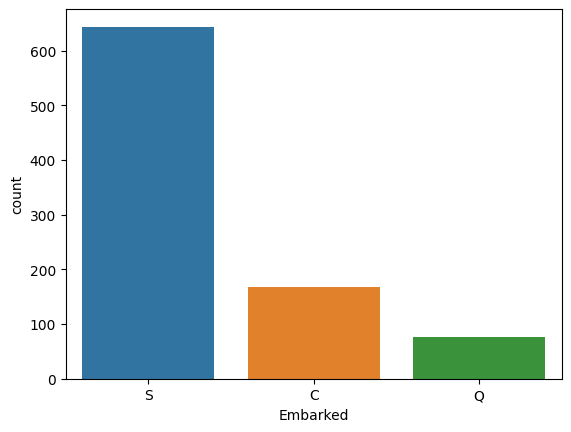

In [12]:
sns.countplot(data=titanic, x='Embarked');

## Selecting Data

In [13]:
# Select all observations for a single variable (i.e. a DataFrame column)
titanic.Age
# This also works (and is prefarable as it will also work when the column name has a space in it):
# titanic['Age']
# This also works, but isn't very nice
# titanic.loc[:, 'Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
# Select adjacent columns
titanic.iloc[:, 2:4]

,Pclass,Name
0,3,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,3,"Allen, Mr. William Henry"
...,...,...
886,2,"Montvila, Rev. Juozas"
887,1,"Graham, Miss. Margaret Edith"
888,3,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,"Behr, Mr. Karl Howell"


You can also select multiple columns based on their names.
This is often clearer than selecting based on position and the columns must 
not be adjacent.

In [15]:
titanic[['Name', 'Age', 'Cabin']] # Note: two sets of square brackets!

,Name,Age,Cabin
0,"Braund, Mr. Owen Harris",22.0,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,C85
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123
4,"Allen, Mr. William Henry",35.0,NaN
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,NaN
887,"Graham, Miss. Margaret Edith",19.0,B42
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,NaN
889,"Behr, Mr. Karl Howell",26.0,C148


In [16]:
# Observation with row number 5 (counting from zero)
print(titanic.iloc[5])

# The first 4 observations
titanic.iloc[0:4]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
# Select observations where the value of Age is less than 18
titanic[titanic.Age < 18]  

# The same, but only keep the column 'Embarked'
titanic[titanic.Age < 18].Embarked

# The same, but keep columns 'Age' and 'Embarked'
titanic[titanic['Age'] < 18][['Age', 'Embarked']]

In [ ]:
# Select all boys younger than 10
titanic.query("(Sex=='male') and (Age < 18)")

## Dropping Data and Working with Missing Data

Pandas tries to make working with missing data as easy as possible. E.g., all of the descriptive statistics on pandas objects exclude missing data by default.

Let's starting by reading the titanic data again.

In [17]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DataRepo2019/Data-files/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The `PassengerId` column is identical to the index hence it doesn't provide any additional useful information. Let's drop this column (rather than setting it as the index as before). This can by done using `drop`.

In [ ]:
titanic.drop("PassengerId", axis="columns")

Notice that we actually didn't change the `titanic` `DataFrame`.  We can either assign the result of `drop` to a (new) `DataFrame`
or we can use `inplace=True`.

In [ ]:
titanic.head(3) # PassengerId is still here

In [ ]:
titanic = titanic.drop("PassengerId", axis="columns")
titanic.head(3) # PassengerId is now gone

From the output of the `info` method we can infer that certain columns contain many missing values, e.g. `Cabin` only contains 204 non-missing values. 
For the purposes of illustration, let's drop any row that has a missing observation by using 
the default behaviour of the `dropna` method.

In [ ]:
titanic.info()

In [ ]:
cleaned = titanic.dropna() # Drop any row that has at least one missing value
print(cleaned.info())
cleaned.head(5)

This would only keep 183 values, which isn't a lot. We could also choose to drop only the rows that consist of nothing but missing values (there are no such rows in the `titanic` `DataFrame`), but here you can see how this would be done.

In [ ]:
cleaned = titanic.dropna(how="all")
cleaned.info()

Instead of relying on `info` to compute the number of non missing values we can also use the `isnull` and/or `notnull` methods.
`notnull` computes a boolean `DataFrame` where an entry is `True` if and only if that entry is considered to be non missing in the original `DataFrame`. We can then use `sum` the compute the sum of each column. This gives the number of non missing values per column.  

In [ ]:
not_null_df = titanic.notnull()
print(not_null_df.tail(3))
print("Number of non null values in each column:")
print(not_null_df.sum())

An even easier alternative is to simply use `count` on the `DataFrame`.

In [ ]:
print(titanic.count())

The `Cabin` column has too many missing values, so probably isn't useful. For the `Age` column, we can *impute* the missing values, e.g. with the average age of all passengers. (We will see later what this means exactly). Let's do this using `fillna`.

In [ ]:
# First compute the average age
avg_age = titanic['Age'].mean()
print(f"(Rounded) Average age of passengers: {round(avg_age)}")
titanic = titanic.fillna(value={'Age' : avg_age})
print("We should now confirm that the 'Age' column no longer has missing values")
titanic.info()

## Creating New Columns

We use a dataset containing $NO_2$ measurements in the the stations of Paris, Antwerp and London.

Let's read the data and check whether it worked.

In [ ]:
URL = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2.csv"
air_quality = pd.read_csv(URL)
print(air_quality.info())
air_quality.head()

We see that 
- the dates are stored as strings (object)
- `datetime` is added as a column and we have a `RangeIndex`.

We would like to
- parse the dates, so that they are available as `datetime` objects
- index the `DataFrame` rows by this date.

This can be achieved by specifying the index column and by indicating that dates must be parsed on `read_csv`. Let's try again.

In [ ]:
air_quality = pd.read_csv(URL, index_col=0, parse_dates=True)
print(air_quality.info())
air_quality.head()

We can clearly see the difference!

### Creating a New Column Derived from (an) Existing Column(s)

Assume we would like to express the concentration of the station in London in mg/m^3

*(If we assume temperature of 25 degrees Celsius and pressure of 1013 hPa, the conversion factor is 1.882)*

In [ ]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

To create a new column, use the `[]` brackets with the new column name at the left side of the assignment.  The computation is done **element wise**, hence there is no need for an explict loop!

We can also use multiple columns to derive a new column.

Let's check the ratio of the values in Paris versus Antwerp and save the result in a new column.

In [ ]:
air_quality["ratio_paris_antwerp"] = air_quality["station_paris"] / air_quality["station_antwerp"]
air_quality.head()

We can also perform more general mappings on columns, either using a function or a dictionary.

Let's work with the Titanic data once more.  Let's say we want to numerically encode the `Sex` column, this can be done as follows. First let's check the unique values in the `Sex` column.

In [ ]:
titanic['Sex'].unique()

In [ ]:
mapping_dict = {'male' : 0, 'female' : 1}
titanic['Sex'] = titanic['Sex'].map(mapping_dict)

Let's check whether it worked.

In [ ]:
titanic.head()

Let's add a new feature (i.e. a new column). When `Age` is less than 12 we will call this passenger a `child`, 
between 12 and 18 a `teen` and over 18 will be `adult`s.  First, we define a Python function implementing 
this mapping, and then we apply it to the `Age` column.

In [ ]:
def age_to_category(age):
    if age < 12:
        return "child"
    if age < 18:
        return "teen"
    return "adult"

titanic['AgeCategory'] = titanic['Age'].map(age_to_category)
titanic.head()

Here, we only scratched the surface of what is possible with pandas (and indeed, whole books have been written about pandas). In general the pandas getting started guide, the user guide and the API reference are very good resources to find additional information. You can find 
all of these [here](https://pandas.pydata.org/pandas-docs/stable/index.html).